![Logo TUBAF](https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png)

Exercise material of the MSc-level course **Foundations of Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Slope stability -- circular slip surface

Aside from studying different slope stability cases, we compare the results when using the 2009 and the 2021 version of DIN4084, which differ in the way mobilized shear strength is taken into account. This resulted in a explicit function in the old norm, and an implicit function to be solved iteratively in the new norm.

In [1]:
#HIDDEN
#%matplotlib widget
import numpy as np #numerical methods
#import sympy as sp #symbolic operations
import matplotlib.pyplot as plt #plotting
from matplotlib import patches
import sympy as sp
sp.init_printing(use_latex='mathjax') #makes sympy output look nice
from scipy.optimize import fsolve

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/slope_stability_plots.ipynb

## Geometry 

Let the slope have a vertical height $H$ and the slope angle $\beta$. The geometry of the slope is then given by:

* Foot: $F = [0,0]$
* Shoulder: $S = [H / \tan \beta, H]$

## Assumptions / Limitations

* Dry soil
* Slip circle through foot

In [2]:
#Slope geometry
H = 4.5
beta = np.arctan(4.5/9)

#Variation of slip circle centers
Mx = np.linspace(-H,H/np.tan(beta),30)
Mz = np.linspace(0.8*H,4*H,20)

#Soil properties
c = 5
phi = np.deg2rad(20)
gamma = 16

#Distributed load (magnitude and range from shoulder)
p_load = 30. #kN/m²
xSV = np.array([0.5,3.5])

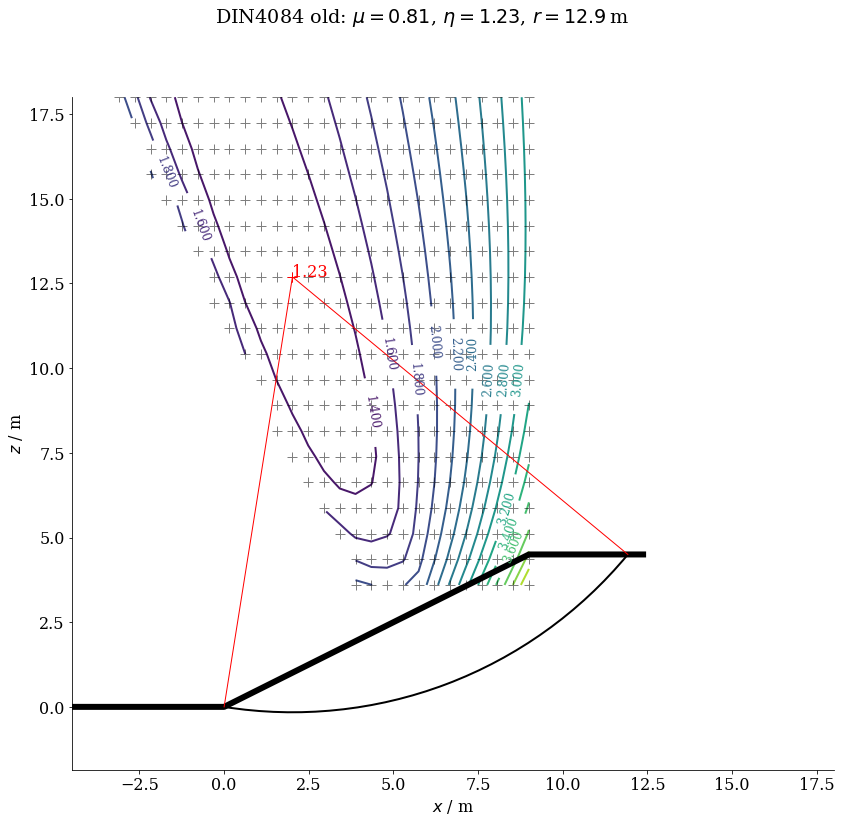

In [3]:
run_analysis()

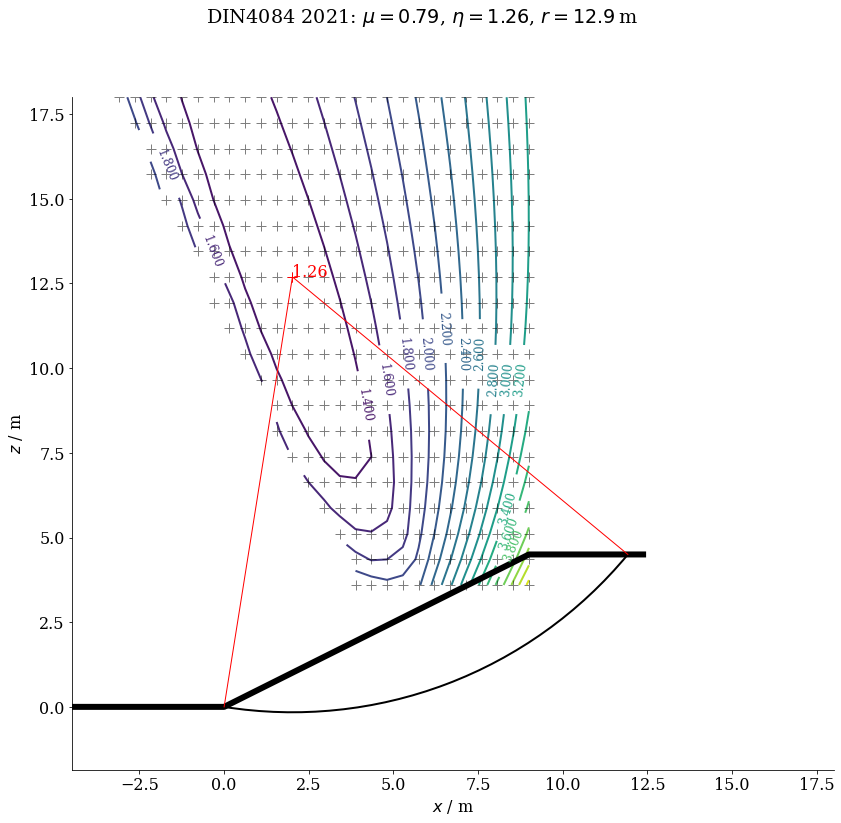

In [4]:
run_analysis_new()

How does the factor of safety change if we remove the top load?

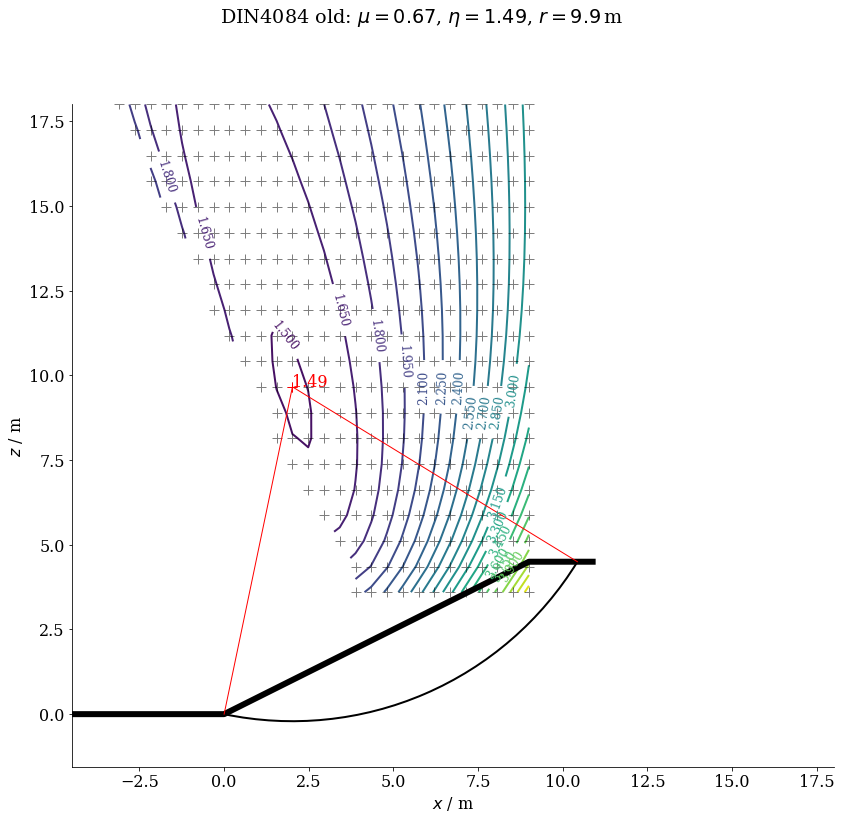

In [5]:
p_load = 0
run_analysis()

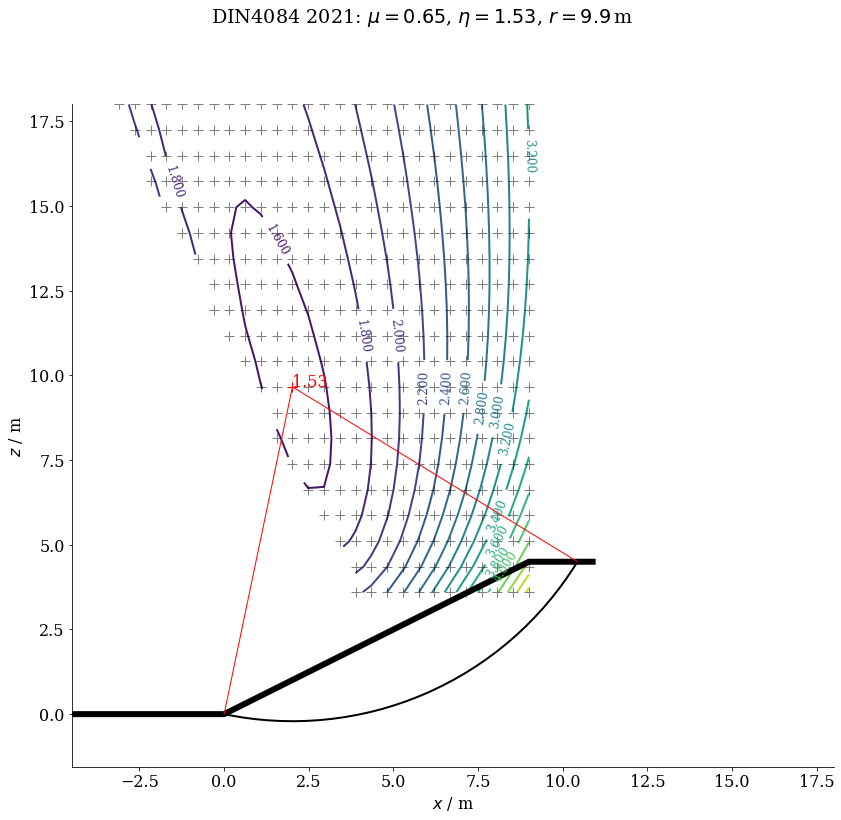

In [6]:
run_analysis_new()

How does the slip circle geometry change if we make the slope less cohesive?

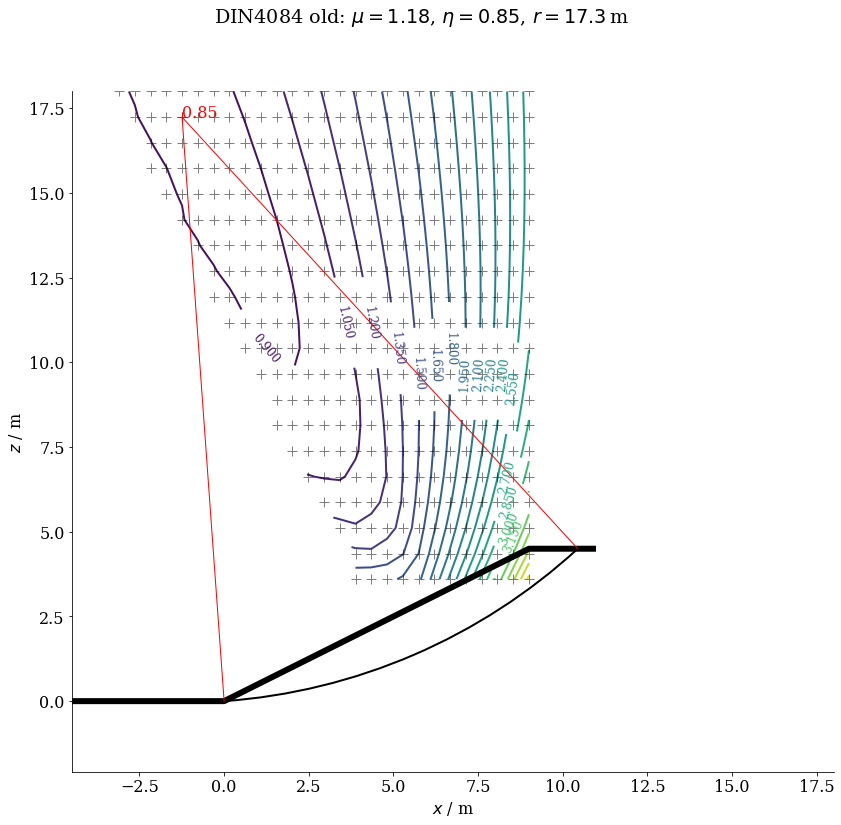

In [7]:
p_load = 30.
c = 0.5
run_analysis()

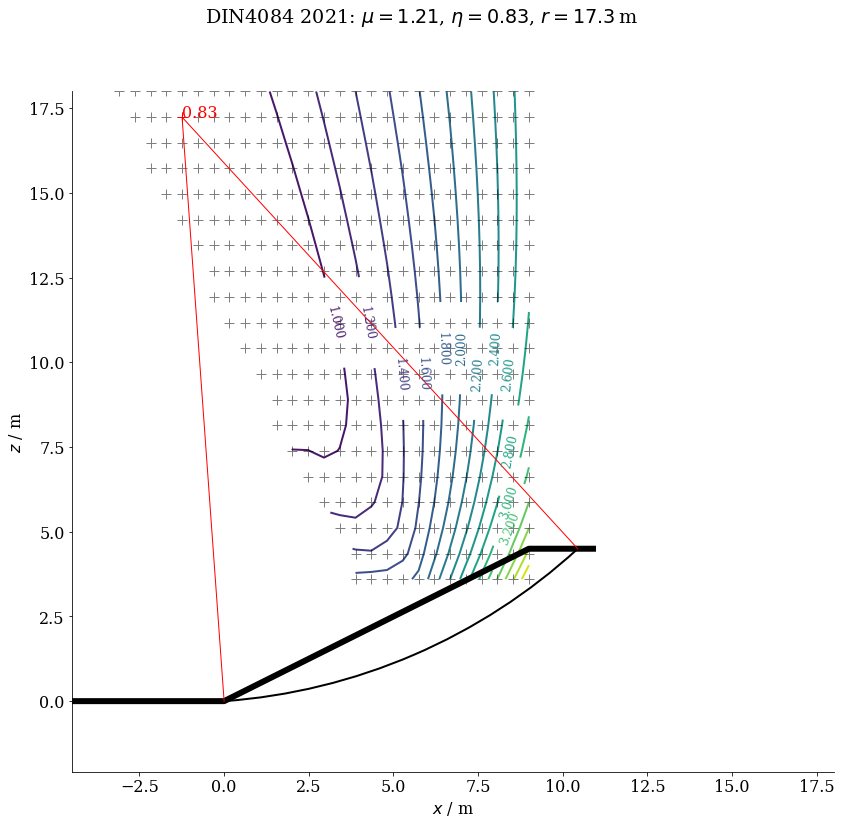

In [8]:
run_analysis_new()

... or more cohesive?

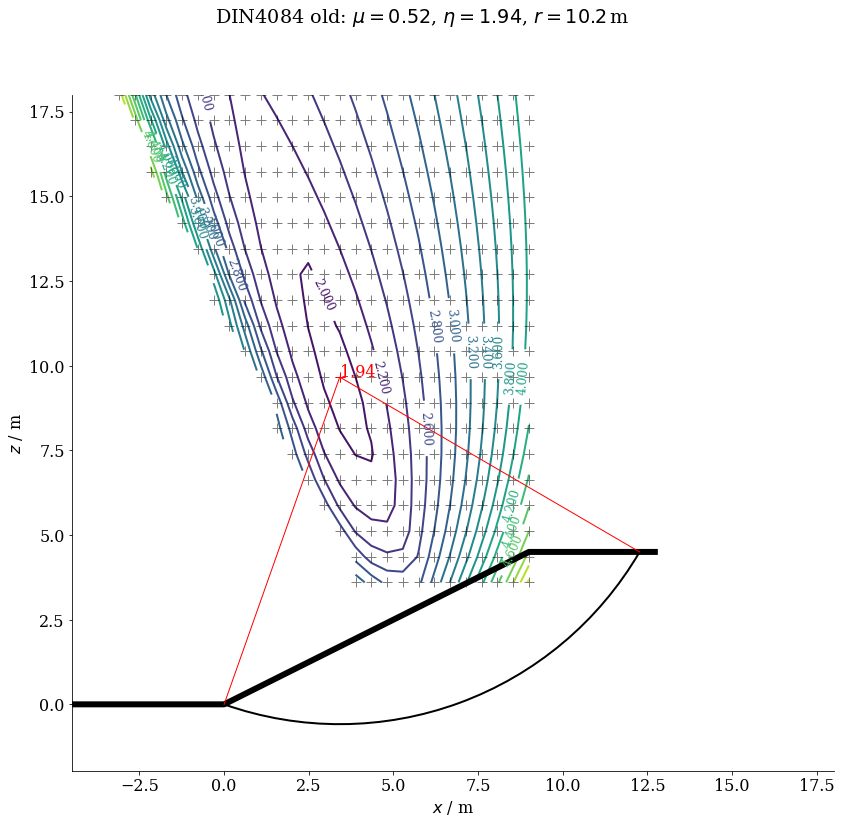

In [9]:
c = 15.
run_analysis()

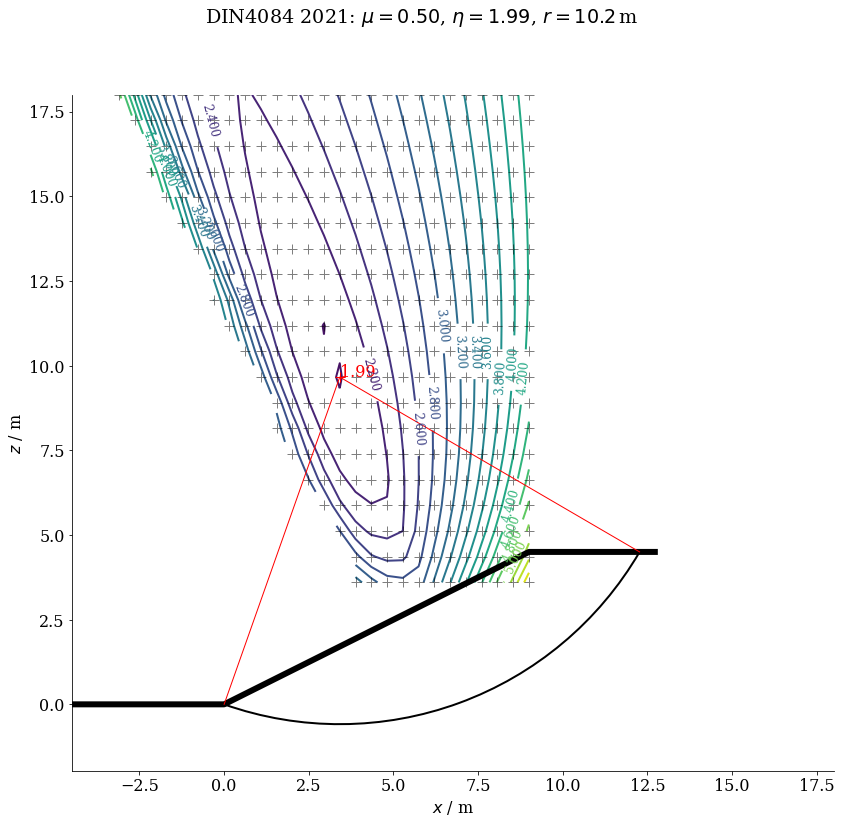

In [10]:
run_analysis_new()

How does the isoline field change when we narrow the area of the vertical load, keeping the equivalent force and moment the same?

In [11]:
c = 5.
(xSV[1]-xSV[0])*p_load

90.0

In [12]:
p_load = 90.
xSV = np.array([1.5,2.5])
(xSV[1]-xSV[0])*p_load

90.0

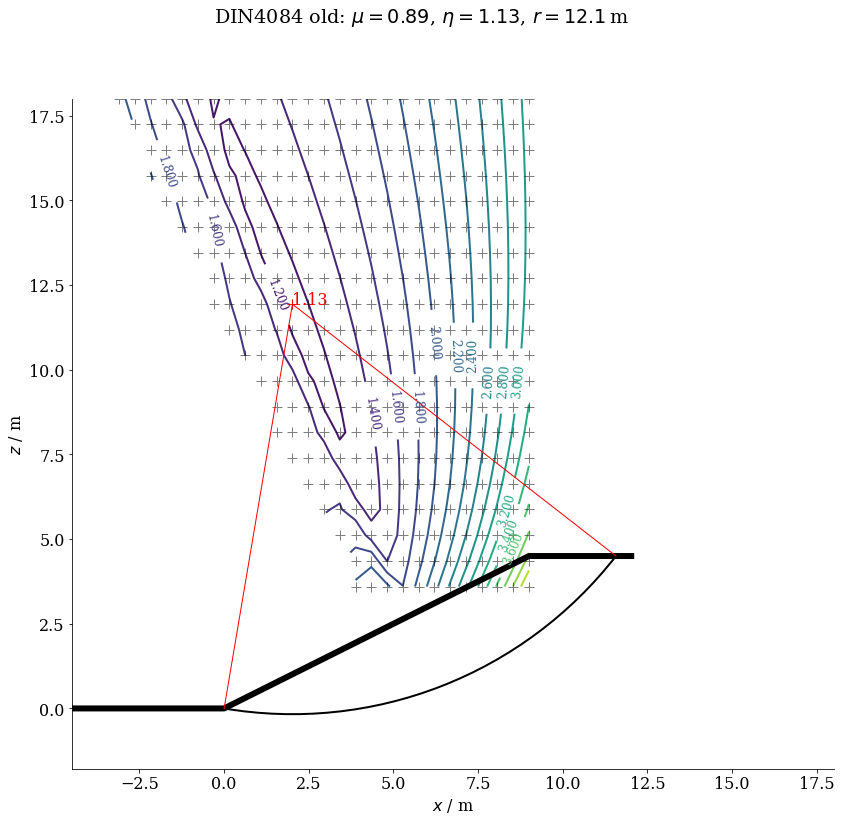

In [13]:
run_analysis()

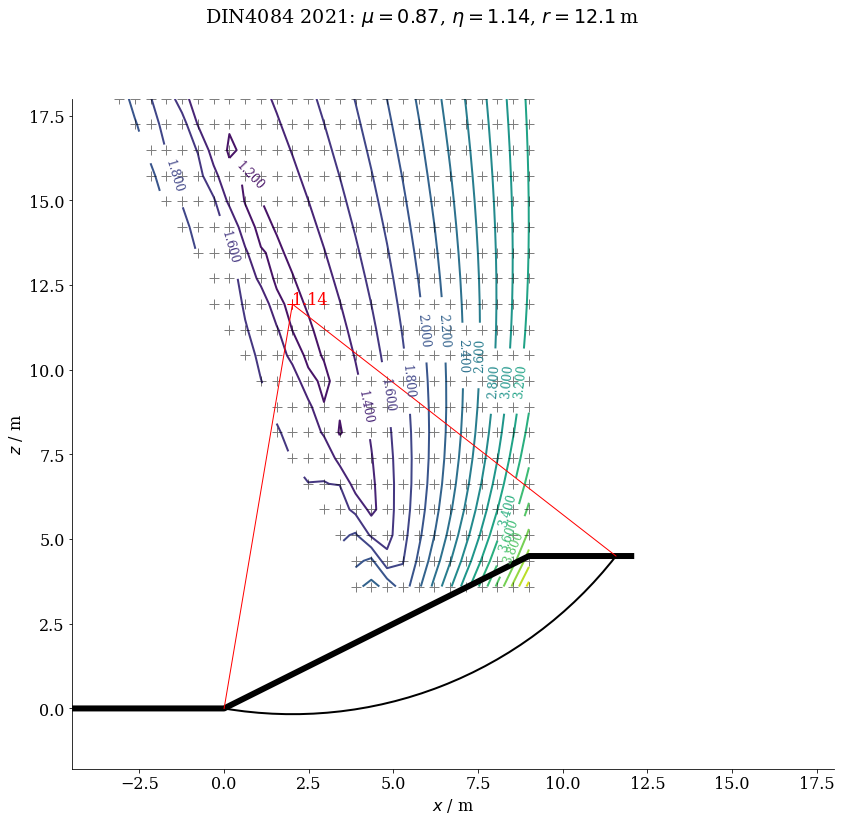

In [14]:
run_analysis_new()

An increasingly narrow 'valley' develops parallel to the symmetry line ...